In [103]:
import math
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [104]:
def monte_carlo(mu, sig, mu_, sig_, n):
    
    EOY_norm = st.norm(mu, sig)
    Mon_perc_norm = st.norm(mu_, sig_)
    samples = EOY_norm.rvs(size=n) * Mon_perc_norm.rvs(size=n)
    
    new_mu  = np.mean(samples)
    new_var = np.sqrt(np.var(samples))
    vals = [new_mu, new_var]

    return vals

In [105]:
# Best Guess for EOY values (in millions)
dollars = [403019034.14,404752366.45,400999389.18,403282200.6,384090833.89,376924436.84,358926183.2]

n    = 5000                         # # of Monte Carlo simulations (use at least 100)
mu   = np.mean(dollars)             # EOY prediction average
sig  = np.sqrt(np.var(dollars))     # EOY prediction standard deviation

name_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mu_month   = [.078,.082,.090,.081,.081,.083,.082,.092,.084,.090,.078,0.079]
sig_month  = [.0078,.0025,.0053,.0057,.0047,.0082,.0067,.0023,.0017,.0073,.0054,.0120,]

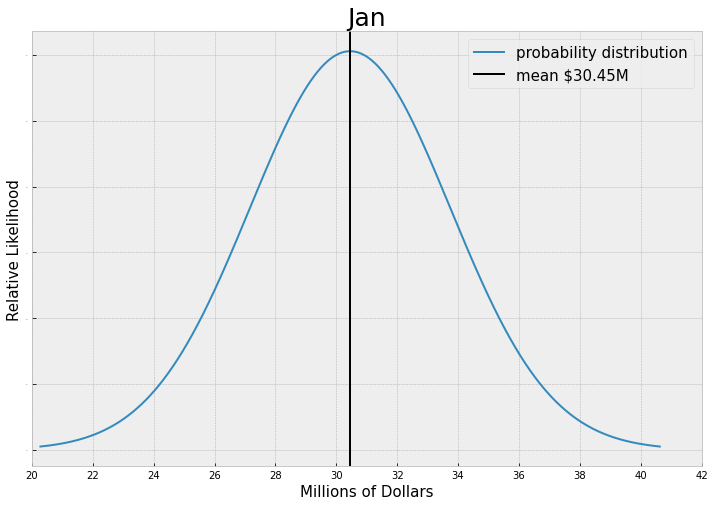

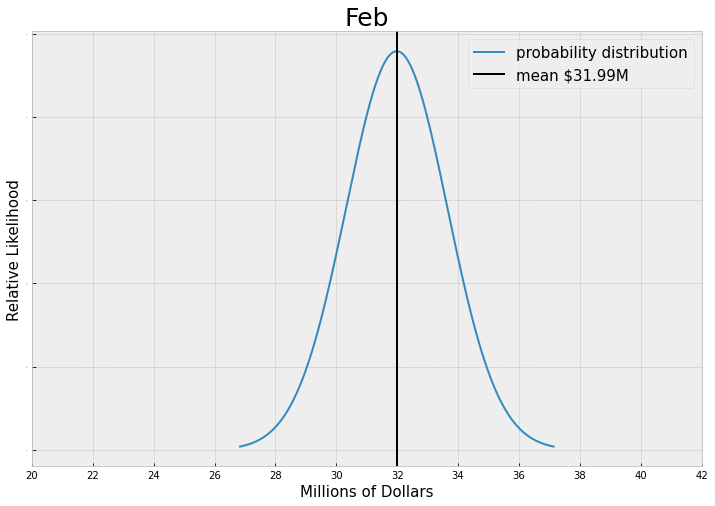

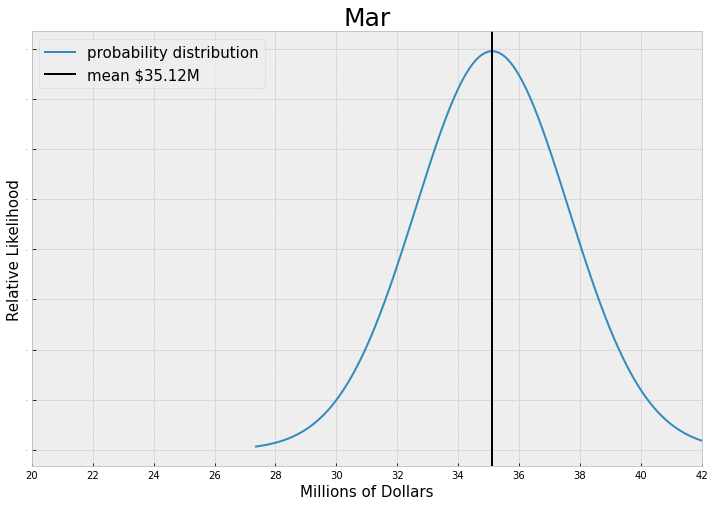

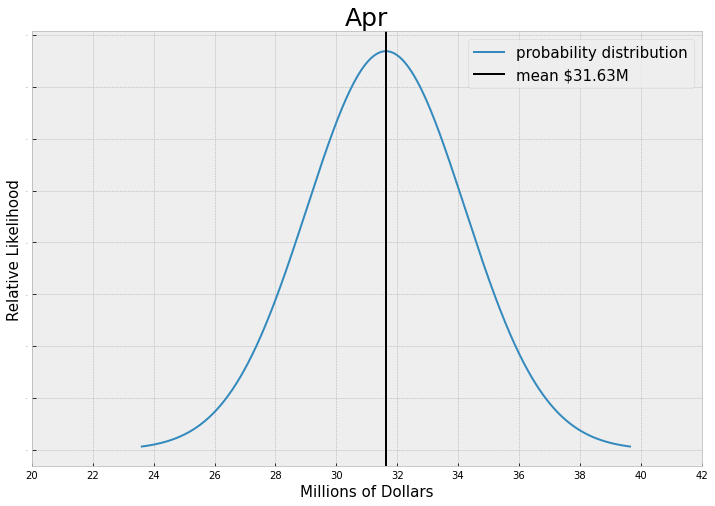

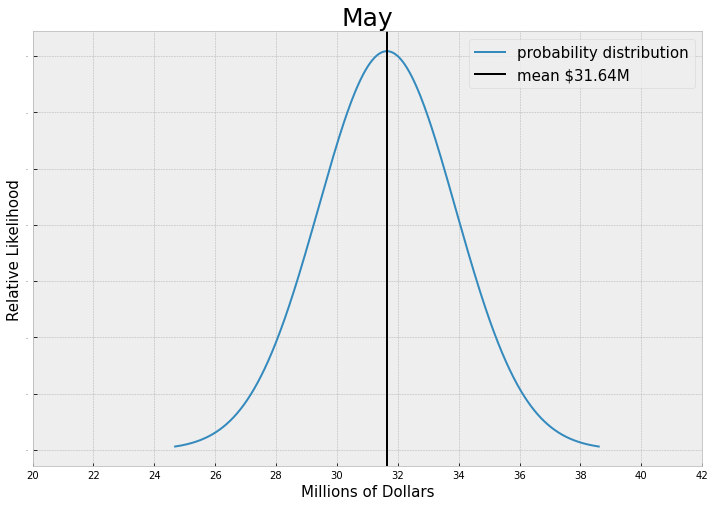

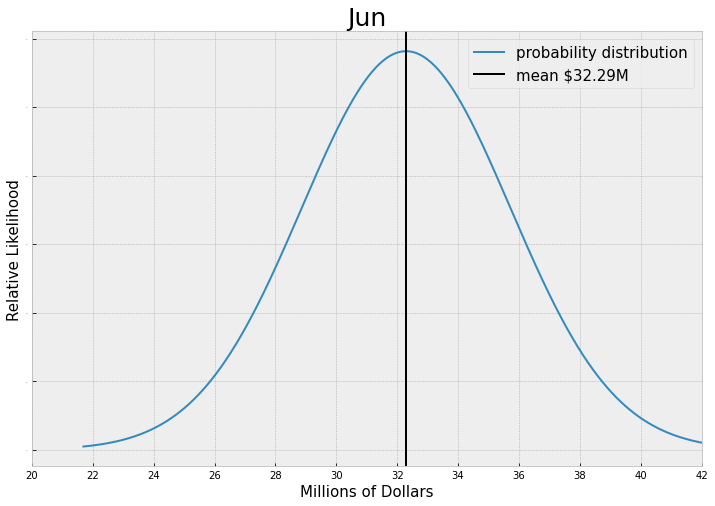

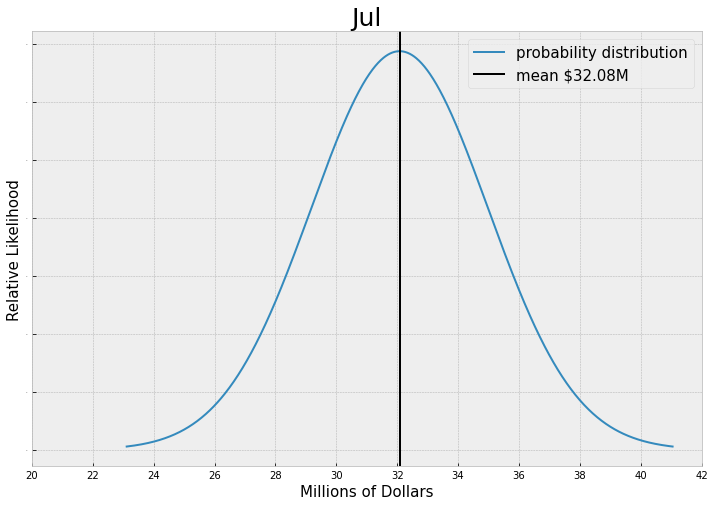

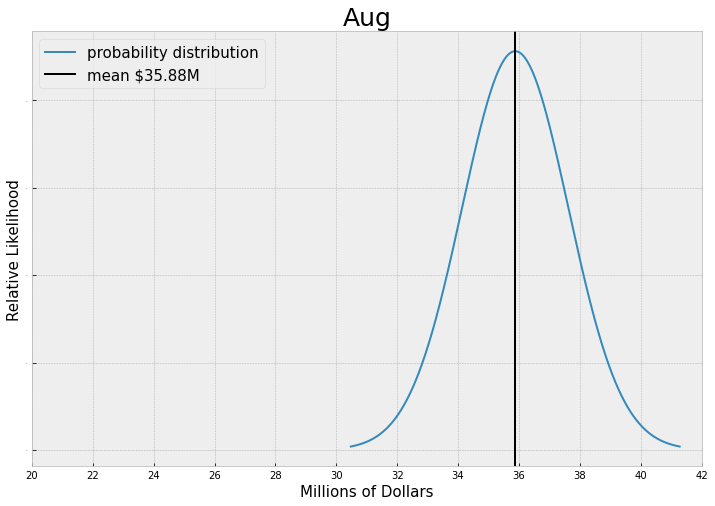

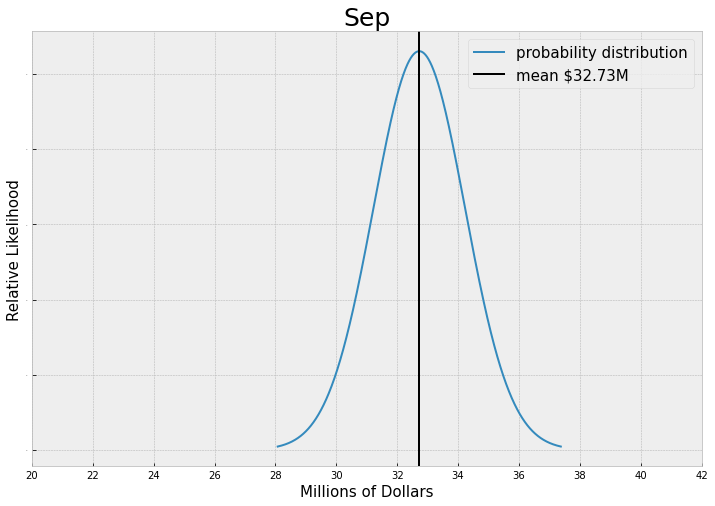

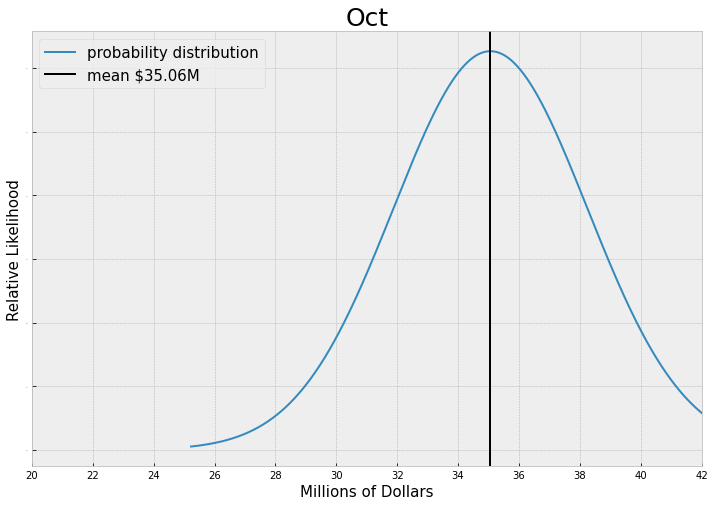

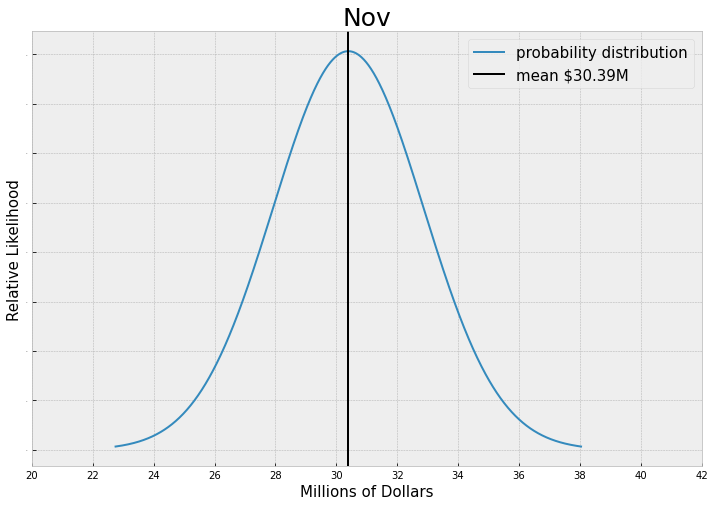

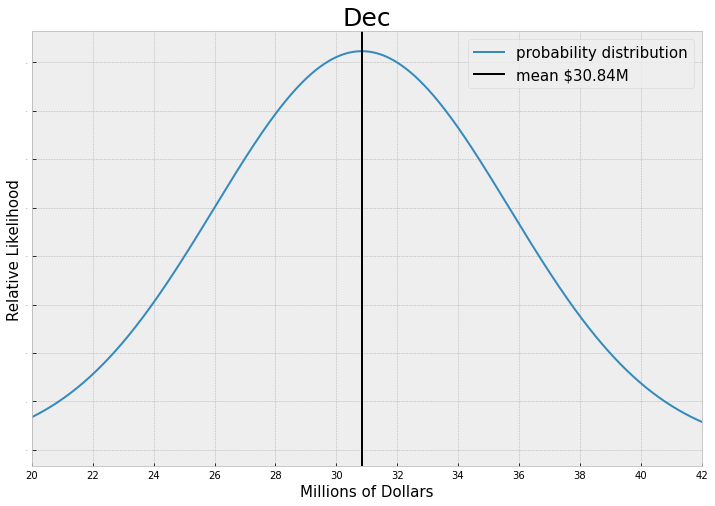

In [106]:
i = 0
while i < 12:
    
    super_mu, super_sig = monte_carlo(mu, sig, mu_month[i], sig_month[i], n)
    super_mu = super_mu/1000000
    super_sig = super_sig/1000000
    super_norm = st.norm(super_mu, super_sig)
    
    min = super_norm.ppf(0.001)
    max = super_norm.ppf(0.999)
    x = np.linspace(min, max,1000)
    
    fig = plt.figure(figsize=(12,8))
    plt.style.use('bmh')
    ax = plt.subplot2grid((1,1),(0,0))
    
    ax.plot(x, super_norm.pdf(x), label='probability distribution');
    ax.axvline(super_mu, label='mean ${:1.2f}M'.format(super_mu), color='black')
    ax.set_title(name_month[i], size=25)
    ax.set_xlabel('Millions of Dollars', size=15);
    ax.set_ylabel('Relative Likelihood', size=15);
    ax.legend(loc='best', fontsize=15);
    ax.set_xticks(np.arange(20,44,2))
    ax.tick_params(axis='y', labelsize=0)
    ax.set_xlim([20,42])
    
    i+=1